In [1]:
import random,string,math,csv
import pandas as pd 
import matplotlib.pyplot as plt
from  sklearn.preprocessing  import  StandardScaler 
import pylab
from sklearn.decomposition import PCA
from sklearn import tree
import graphviz 
import numpy as np
from sklearn import dummy
from sklearn import svm
from sklearn import linear_model
from matplotlib import cm as cm
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [2]:
file = "atlas-higgs-challenge-2014-v2.csv"
df = pd.read_csv(file)
#print(df)

In [3]:
lab = df['Label'].copy()
df = df.drop('Label', 1).copy()
df = df.drop('EventId', 1).copy()
df = df.drop('KaggleSet', 1).copy()
df = df.drop('KaggleWeight', 1).copy()
#print(lab)

In [4]:
nb_s = len(lab[lab=='s'])
nb_b = len(lab[lab=='b'])
p_s = nb_s/(nb_s+nb_b)
p_b = nb_b/(nb_s+nb_b)
#Pourcentage de positif/negatif
print(p_s, p_b)

0.3416609837235621 0.6583390162764379


In [5]:
#stat attributs manquant
tmp = df[['PRI_jet_num','DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','DER_lep_eta_centrality','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi','PRI_jet_subleading_eta','PRI_jet_subleading_phi']]
nb_0=len(tmp[tmp['PRI_jet_num']==0])
print("stat 3 attributs manquant",nb_0/len(tmp))
nb_inf_1 = len(tmp[tmp['PRI_jet_num']==1])
print("stat 10 attributs manquant", nb_inf_1/len(tmp))

stat 3 attributs manquant 0.40009263808329604
stat 10 attributs manquant 0.30905677810123705


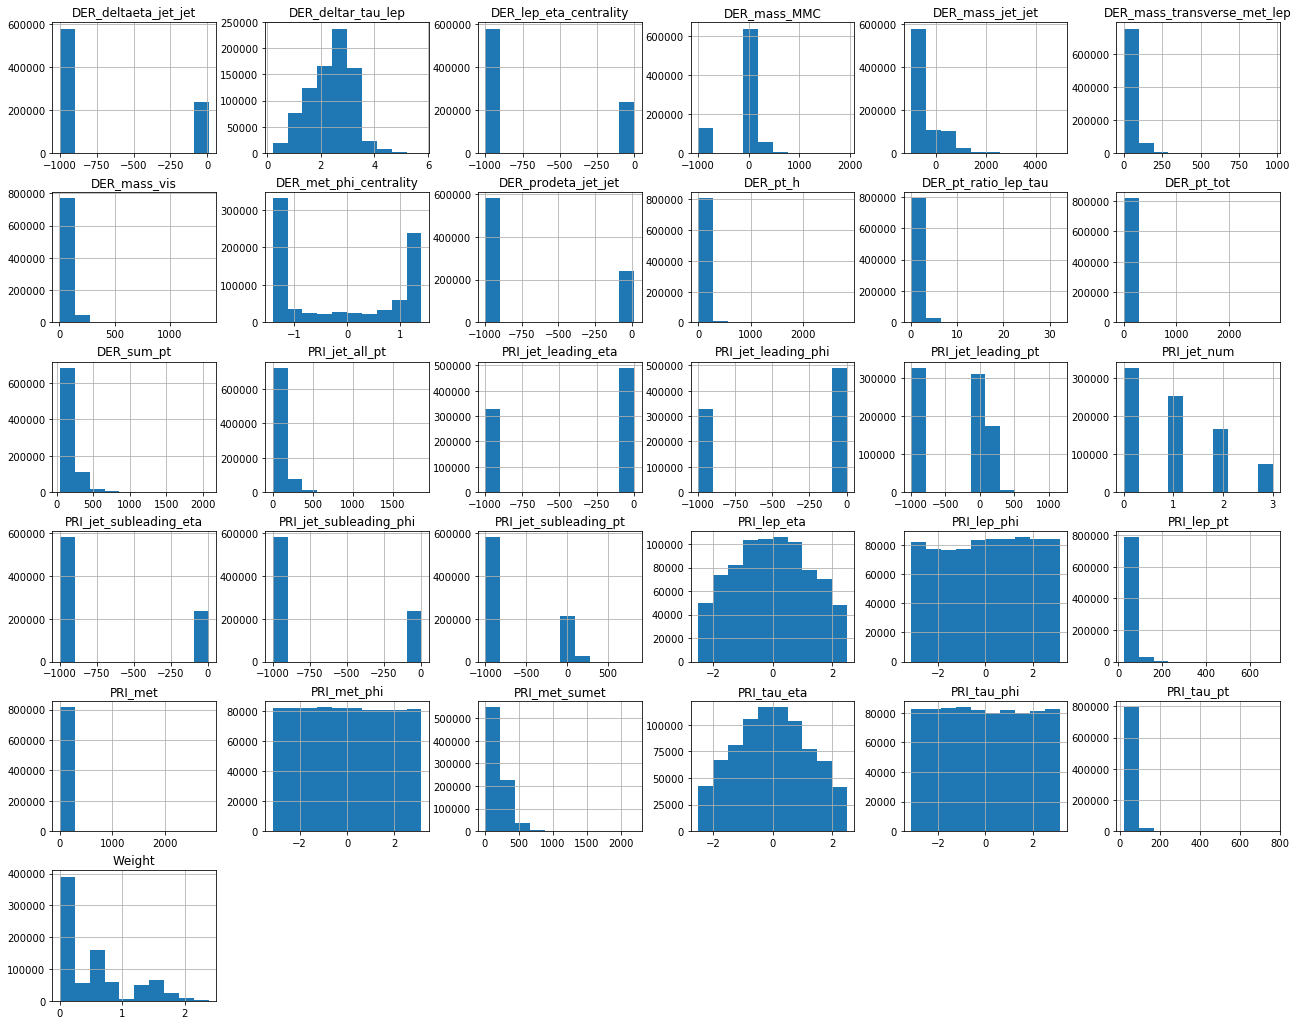

In [6]:
hist = df.hist(figsize=(22, 18))
fig = plt.figure(1)
fig.savefig('histogrammes.png')
plt.show()

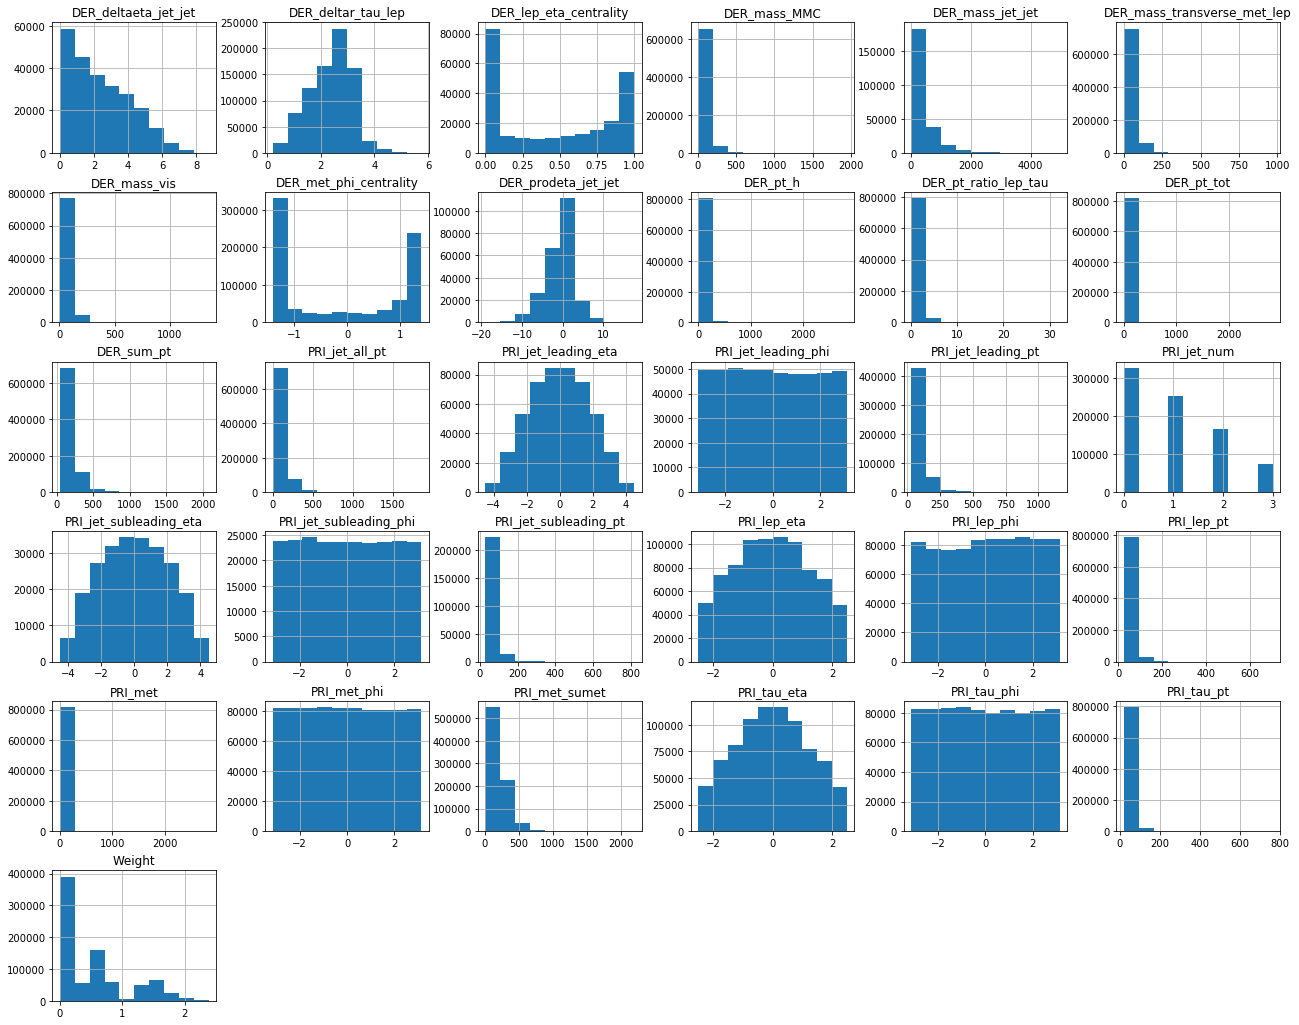

In [7]:
hist = df[df!=-999.000].hist(figsize=(22, 18))
fig = plt.figure(1)
fig.savefig('hist_sans_nan.png')
plt.show()

In [8]:
len(df[df['PRI_met']>0])

818238

In [5]:
df = df.drop('Weight', 1).copy()

In [6]:
features = df.columns
x = df.values
y = lab.values
pd.DataFrame(x, columns=features)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
4,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,...,2.237,282.849,3.0,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,...,-1.443,294.074,2.0,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,...,-1.761,187.299,1.0,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,...,0.024,129.804,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,...,0.845,294.741,1.0,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


In [7]:
x = StandardScaler().fit_transform(x)      #normalisation
pd.DataFrame(x, columns=features)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0.461169,0.067902,0.411171,-0.471040,1.558181,1.100465,1.569166,0.883789,1.047444,0.337358,...,-0.148047,0.384999,1.042179,0.780708,0.821046,0.817597,1.535972,1.564214,1.556035,0.409750
1,0.516490,0.551613,0.544430,-0.153024,-0.640420,-0.605427,-0.640416,1.407561,-0.770657,-0.288046,...,-1.052222,-0.357703,0.020512,0.740923,0.818135,0.819055,-0.639996,-0.640420,-0.640420,-0.274373
2,-2.339666,3.191741,1.104226,-0.350321,-0.640420,-0.605427,-0.640416,0.991361,-0.439520,0.337823,...,-1.201171,0.398254,0.020512,0.737219,0.820848,0.812546,-0.639996,-0.640420,-0.640420,-0.294458
3,0.474552,0.909146,-0.004868,-0.905753,-0.640420,-0.605427,-0.640416,1.198820,-0.846574,-0.711761,...,0.037863,-0.976581,-1.001155,-1.219745,-1.224504,-1.224503,-0.639996,-0.640420,-0.640420,-0.744476
4,0.553245,-0.914048,1.322348,-0.653576,-0.640420,-0.605427,-0.640416,1.942858,-0.117007,-0.866684,...,-0.475735,-1.236256,-1.001155,-1.219745,-1.224504,-1.224503,-0.639996,-0.640420,-0.640420,-0.744476
5,0.341189,-1.009162,-0.541895,0.922453,1.561976,1.343166,1.562094,-1.295818,1.945819,1.036094,...,1.238833,0.575163,2.063847,0.824062,0.811725,0.815355,1.557008,1.561975,1.568336,1.224980
6,0.486491,-0.576358,0.656473,0.761379,1.557792,1.151545,1.563534,0.726273,-0.749350,1.269456,...,-0.791286,0.663677,1.042179,0.884957,0.818419,0.819652,1.558470,1.561770,1.555392,1.084812
7,0.501664,-1.097690,0.334464,-0.452289,-0.640420,-0.605427,-0.640416,0.669926,-0.795841,-0.175883,...,-0.966715,-0.178287,0.020512,0.711683,0.815193,0.813167,-0.639996,-0.640420,-0.640420,-0.432898
8,0.380217,0.036923,0.489086,-0.844660,-0.640420,-0.605427,-0.640416,0.678891,-0.669828,-0.803371,...,0.018003,-0.631658,-1.001155,-1.219745,-1.224504,-1.224503,-0.639996,-0.640420,-0.640420,-0.744476
9,0.435519,1.121817,-0.292454,2.137493,-0.640420,-0.605427,-0.640416,-0.979506,0.451189,0.831485,...,0.470918,0.668937,0.020512,0.968854,0.811000,0.811553,-0.639996,-0.640420,-0.640420,0.961332


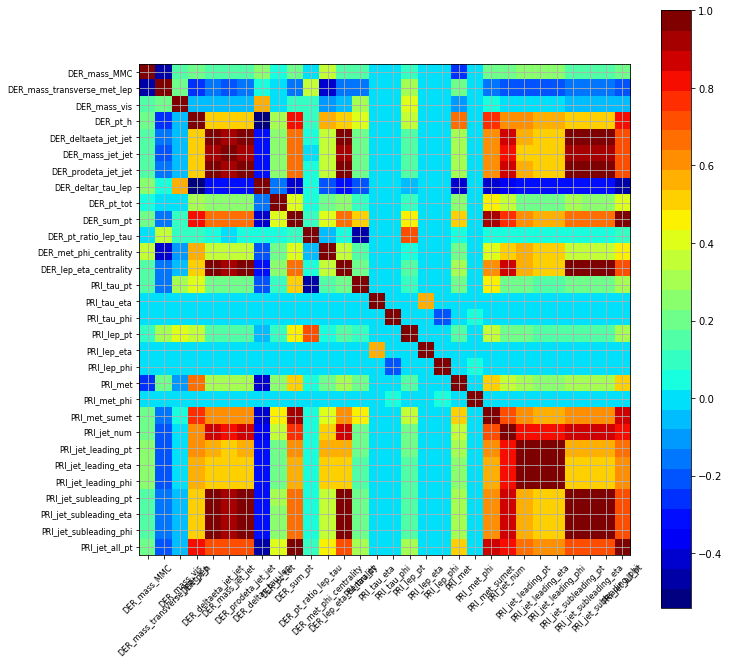

In [8]:
corr = df.corr()

fig = plt.figure(1, figsize=(11,11))
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet',30)
cax = ax1.imshow(corr, interpolation="nearest",cmap=cmap)
ax1.grid(True)
#plt.title("Matrice de corrélation")
plt.xticks(np.arange(len(features)), features,fontsize=8, rotation=45)
plt.yticks(np.arange(len(features)), features,fontsize=8)
fig.colorbar(cax)
plt.show()

In [14]:
#res = []
#for i in range(1,30):
#    clf = tree.DecisionTreeClassifier(max_depth=i)
#    clf = clf.fit(x, y)
#    res.append(clf.score(x,y))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


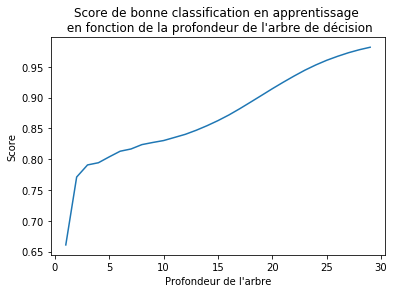

In [ ]:
plt.plot(range(1,30), res)
plt.title("Score de bonne classification en apprentissage \n en fonction de la profondeur de l'arbre de décision")
plt.ylabel("Score")
plt.xlabel("Profondeur de l'arbre")
plt.legend()
plt.show()

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("boson_sans_weight_10") 

TP2

In [ ]:
# classifieur random
class classifieur_aleatoire:
   
    def __init__(self):
        pass
    
    def fit(self):        
        pass
        
    def predict(self, test):
        return np.random.choice(['s', 'b'], size=len(test))
    
    def score(self, test, label):
        sc = 0
        y = self.predict(test)
        for i in range(len(test)):
            if(y[i] == label[i]):
                sc += 1
        return sc/len(test)

In [ ]:
alea = classifieur_aleatoire()
alea.score(x, y)

DUMMY

uniforme

In [11]:
app = random.sample(range(0,len(x)), int(len(x)*0.9))
x_app = x[app]
y_app = y[app]

test = set(np.arange(0,len(x))) - set(app)
test = list(test)
test.sort()
x_test = x[test]
y_test = y[test]

In [8]:
uniform = dummy.DummyClassifier(strategy='uniform')
uniform.fit(x_app, y_app)
print("score apprentissage",uniform.score(x_app, y_app))
print("score test", uniform.score(x_test, y_test))

score apprentissage 0.501258802793
score test 0.502688697693


classe majoritaire

In [9]:
maj = dummy.DummyClassifier(strategy='most_frequent')
maj.fit(x_app, y_app)
print("score apprentissage",maj.score(x_app, y_app))
print("score test", maj.score(x_test, y_test))

score apprentissage 0.65885086378
score test 0.653732401251


strategy : proportionnel à la distribution des classes

In [10]:
strat = dummy.DummyClassifier()
strat.fit(x_app, y_app)
print("score apprentissage",strat.score(x_app, y_app))
print("score test", strat.score(x_test, y_test))

score apprentissage 0.551007992787
score test 0.549912006257


arbre de décision

In [11]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_app, y_app)
print("score apprentissage", clf.score(x_app, y_app))
print("score test",clf.score(x_test,y_test))

score apprentissage 1.0
score test 0.768723113023


étude attribut par attribut

In [16]:
x1 = df[["DER_mass_MMC"]].values
y = lab.values
app1 = random.sample(range(0,len(x)), int(len(x)*0.9))
x_app1 = x1[app1]
y_app = y[app1]

test = set(np.arange(0,len(x))) - set(app1)
test = list(test)
test.sort()
x_test1 = x1[test]
y_test = y[test]

In [18]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_app1, y_app)
print("score apprentissage", clf.score(x_app1, y_app))
print("score test",clf.score(x_test1,y_test))

score apprentissage 0.798219479803
score test 0.710940555338


In [19]:
x2 = df[["DER_mass_transverse_met_lep"]].values
y = lab.values
app2 = random.sample(range(0,len(x)), int(len(x)*0.9))
x_app2 = x2[app2]
y_app = y[app2]

test = set(np.arange(0,len(x))) - set(app2)
test = list(test)
test.sort()
x_test2 = x2[test]
y_test = y[test]

In [20]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_app2, y_app)
print("score apprentissage", clf.score(x_app2, y_app))
print("score test",clf.score(x_test2,y_test))

score apprentissage 0.751116898918
score test 0.662935080172


In [21]:
x2 = df[["DER_mass_vis"]].values
y = lab.values
app2 = random.sample(range(0,len(x)), int(len(x)*0.9))
x_app2 = x2[app2]
y_app = y[app2]

test = set(np.arange(0,len(x))) - set(app2)
test = list(test)
test.sort()
x_test2 = x2[test]
y_test = y[test]

In [22]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_app2, y_app)
print("score apprentissage", clf.score(x_app2, y_app))
print("score test",clf.score(x_test2,y_test))

score apprentissage 0.736058793016
score test 0.656127786469


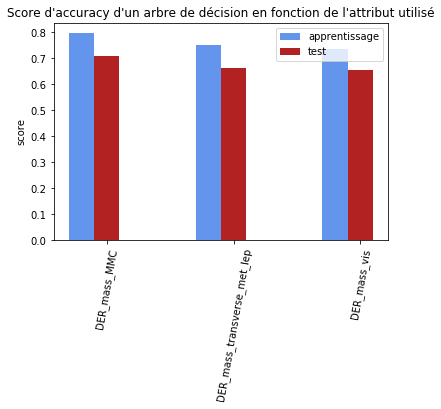

In [5]:
x1 = [0.798219479803, 0.751116898918, 0.736058793016]
x2 = [0.710940555338, 0.662935080172, 0.656127786469]
name=["DER_mass_MMC", "DER_mass_transverse_met_lep", "DER_mass_vis"]
rang = range(1,4)
width = 0.2
p1 = plt.bar(np.array(range(1,4))-0.2, x1, width, color="cornflowerblue" )
#plt.scatter([i+width/2.0 for i in x],x1,color='k',s=40)

p2 = plt.bar(rang, x2, width, color="firebrick")
#plt.scatter([i+width/2.0 for i in x],x1,color='k',s=40)

plt.xticks(rang, name, rotation=80)

plt.ylabel('score')
plt.title("Score d'accuracy d'un arbre de décision en fonction de l'attribut utilisé")
plt.legend((p1[0], p2[0]), ('apprentissage', 'test'))
plt.show()

In [17]:
pd.DataFrame(np.array([[0.798219479803, 0.751116898918, 0.736058793016],[0.710940555338, 0.662935080172, 0.656127786469]]).T, index=["DER_mass_MMC", "DER_mass_transverse_met_lep", "DER_mass_vis"], columns=["accuracy", "validation"])

,accuracy,validation
DER_mass_MMC,0.798219,0.710941
DER_mass_transverse_met_lep,0.751117,0.662935
DER_mass_vis,0.736059,0.656128


SVM

linéaire

In [12]:
svm_lin = svm.SVC(kernel='linear', max_iter=500)
svm_lin.fit(x_app, y_app)
print("score apprentissage", svm_lin.score(x_app, y_app))
print("score test", svm_lin.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


score apprentissage 0.362897772177
score test 0.368473797419


rbf

In [13]:
svm_rbf = svm.SVC(max_iter=500)
svm_rbf.fit(x_app, y_app)
print("score apprentissage", svm_rbf.score(x_app, y_app))
print("score test", svm_rbf.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


score apprentissage 0.67021946894
score test 0.665342686742


polynomiale

In [14]:
svm_poly = svm.SVC(kernel='poly', max_iter=500)
svm_poly.fit(x_app, y_app)
print("score apprentissage", svm_poly.score(x_app, y_app))
print("score test", svm_poly.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


score apprentissage 0.658829136871
score test 0.653707958545


Regression logistique

In [15]:
reg = linear_model.LogisticRegression()
reg.fit(x_app, y_app)
print("score apprentissage", reg.score(x_app, y_app))
print("score test", reg.score(x_test,y_test))

score apprentissage 0.750697297987
score test 0.748948963629


Knn

In [55]:
per = linear_model.Perceptron()
per.fit(x_app, y_app)
print("score apprentissage", per.score(x_app, y_app))
print("score test", per.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


score apprentissage 0.706522418096
score test 0.707481912397


histogramme

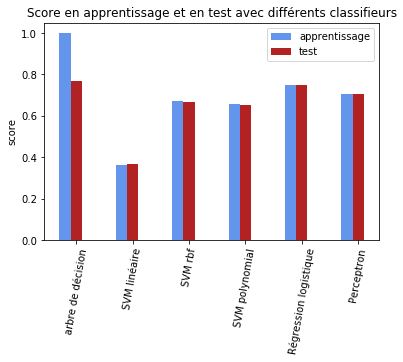

In [24]:
x1 = [1.0, 0.362897772177, 0.67021946894, 0.658829136871, 0.750697297987, 0.706522418096]
x2 = [0.768723113023, 0.368473797419, 0.665342686742, 0.653707958545, 0.748948963629, 0.707481912397]
name=["arbre de décision", "SVM linéaire", "SVM rbf", "SVM polynomial", "Régression logistique", "Perceptron"]
rang = range(1,7)
width = 0.2
p1 = plt.bar(np.array(range(1,7))-0.2, x1, width, color="cornflowerblue" )
#plt.scatter([i+width/2.0 for i in x],x1,color='k',s=40)

p2 = plt.bar(rang, x2, width, color="firebrick")
#plt.scatter([i+width/2.0 for i in x],x1,color='k',s=40)

plt.xticks(rang, name, rotation=80)

plt.ylabel('score')
plt.title('Score en apprentissage et en test avec différents classifieurs')
plt.legend((p1[0], p2[0]), ('apprentissage', 'test'))
plt.show()

In [25]:
arr = np.array([x1, x2]).T
pd.DataFrame(arr, index=name, columns=["Score app", "Score test"])

,Score app,Score test
arbre de décision,1.000000,0.768723
SVM linéaire,0.362898,0.368474
SVM rbf,0.670219,0.665343
SVM polynomial,0.658829,0.653708
Régression logistique,0.750697,0.748949
Perceptron,0.706522,0.707482


Jeux de données équilibré

arbre de décision

In [23]:
clf = tree.DecisionTreeClassifier(class_weight="balanced")
clf.fit(x_app, y_app)
print("score apprentissage", clf.score(x_app, y_app))
print("score test", clf.score(x_test,y_test))

score apprentissage 1.0
score test 0.769676378569


In [24]:
svm_lin = svm.SVC(kernel='linear', max_iter=500, class_weight="balanced")
svm_lin.fit(x_app, y_app)
print("score apprentissage", svm_lin.score(x_app, y_app))
print("score test", svm_lin.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


score apprentissage 0.515674606947
score test 0.518136488072


In [27]:
svm_lin = svm.SVC(kernel='rbf', max_iter=500, class_weight="balanced")
svm_lin.fit(x_app, y_app)
print("score apprentissage", svm_lin.score(x_app, y_app))
print("score test", svm_lin.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


score apprentissage 0.341540220582
score test 0.342747849042


In [28]:
svm_lin = svm.SVC(kernel='poly', max_iter=500, class_weight="balanced")
svm_lin.fit(x_app, y_app)
print("score apprentissage", svm_lin.score(x_app, y_app))
print("score test", svm_lin.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


score apprentissage 0.341661076514
score test 0.34285784122


In [29]:
reg = linear_model.LogisticRegression(class_weight="balanced")
reg.fit(x_app, y_app)
print("score apprentissage", reg.score(x_app, y_app))
print("score test", reg.score(x_test,y_test))

score apprentissage 0.734810853677
score test 0.736703167775


In [60]:
per = linear_model.Perceptron(class_weight="balanced")
per.fit(x_app, y_app)
print("score apprentissage", per.score(x_app, y_app))
print("score test", per.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


score apprentissage 0.695232572982
score test 0.695077238952


histogramme

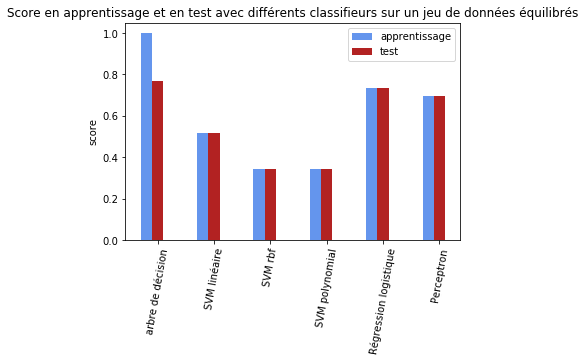

In [62]:

x1 = [1.0, 0.515674606947, 0.341540220582, 0.341661076514, 0.734810853677, 0.695232572982]
x2 = [0.76967, 0.518136488072, 0.342747849042, 0.34285784122, 0.736703167775, 0.695077238952]
name=["arbre de décision", "SVM linéaire", "SVM rbf", "SVM polynomial", "Régression logistique", "Perceptron"]
rang = range(1,7)
width = 0.2
p1 = plt.bar(np.array(range(1,7))-0.2, x1, width, color="cornflowerblue" )
#plt.scatter([i+width/2.0 for i in x],x1,color='k',s=40)

p2 = plt.bar(rang, x2, width, color="firebrick")
#plt.scatter([i+width/2.0 for i in x],x1,color='k',s=40)

plt.xticks(rang, name, rotation=80)

plt.ylabel('score')
plt.title('Score en apprentissage et en test avec différents classifieurs sur un jeu de données équilibrés')
plt.legend((p1[0], p2[0]), ('apprentissage', 'test'))
plt.show()

In [63]:
arr = np.array([x1, x2]).T
pd.DataFrame(arr, index=name, columns=["Score app", "Score test"])

,Score app,Score test
arbre de décision,1.000000,0.769670
SVM linéaire,0.515675,0.518136
SVM rbf,0.341540,0.342748
SVM polynomial,0.341661,0.342858
Régression logistique,0.734811,0.736703
Perceptron,0.695233,0.695077


In [8]:
corr[abs(corr)<0.95]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
DER_mass_MMC,NaN,-0.455013,0.171697,0.199594,0.163511,0.161496,0.163366,0.231129,0.045385,0.201857,...,0.007420,0.222013,0.221498,0.249742,0.246586,0.246583,0.163717,0.163466,0.163462,0.185950
DER_mass_transverse_met_lep,-0.455013,NaN,0.190212,-0.251333,-0.178893,-0.192234,-0.178455,0.040346,0.013515,-0.146308,...,-0.017719,-0.166788,-0.211657,-0.228901,-0.219599,-0.219588,-0.179343,-0.178744,-0.178737,-0.210511
DER_mass_vis,0.171697,0.190212,NaN,-0.062266,-0.030402,-0.038328,-0.030287,0.577233,-0.001239,0.090425,...,-0.002857,0.056359,-0.025115,-0.016434,-0.011046,-0.011036,-0.031295,-0.030363,-0.030359,-0.051010
DER_pt_h,0.199594,-0.251333,-0.062266,NaN,0.522984,0.532930,0.522977,-0.542161,0.304827,0.833337,...,0.009457,0.783675,0.623482,0.623049,0.566328,0.566321,0.531003,0.523040,0.523036,0.808338
DER_deltaeta_jet_jet,0.163511,-0.178893,-0.030402,0.522984,NaN,0.945891,NaN,-0.299049,0.278548,0.671388,...,0.006071,0.617967,0.867925,0.546223,0.523002,0.523004,NaN,NaN,NaN,0.711709
DER_mass_jet_jet,0.161496,-0.192234,-0.038328,0.532930,0.945891,NaN,0.944285,-0.302931,0.255676,0.680001,...,0.006314,0.615574,0.814336,0.522654,0.494423,0.494426,0.947536,0.945352,0.945356,0.719026
DER_prodeta_jet_jet,0.163366,-0.178455,-0.030287,0.522977,NaN,0.944285,NaN,-0.299074,0.279108,0.671565,...,0.006062,0.618277,0.868148,0.546219,0.522998,0.523001,NaN,NaN,NaN,0.711897
DER_deltar_tau_lep,0.231129,0.040346,0.577233,-0.542161,-0.299049,-0.302931,-0.299074,NaN,-0.154959,-0.432648,...,-0.004353,-0.406602,-0.348742,-0.336276,-0.304666,-0.304646,-0.303366,-0.299090,-0.299084,-0.448114
DER_pt_tot,0.045385,0.013515,-0.001239,0.304827,0.278548,0.255676,0.279108,-0.154959,NaN,0.392607,...,0.000492,0.461238,0.369933,0.206763,0.189803,0.189815,0.287234,0.278767,0.278769,0.415369
DER_sum_pt,0.201857,-0.146308,0.090425,0.833337,0.671388,0.680001,0.671565,-0.432648,0.392607,NaN,...,0.007507,0.905125,0.757869,0.639071,0.578950,0.578951,0.687189,0.671522,0.671521,NaN


In [9]:
df2 = df.copy()
indi, indj = np.where(corr>0.99)
f = list(features)
for i,j in zip(indi, indj):
    if(i>j):
        if(f[i]!="0"):
            df2 = df2.drop(f[i],1).copy()
            f[i] = "0"
df2   

NameError: name 'corr' is not defined

In [7]:
x = df2.values
y = lab.values

NameError: name 'df2' is not defined

In [11]:
app = random.sample(range(0,len(x)), int(len(x)*0.9))
x_app = x[app]
y_app = y[app]

test = set(np.arange(0,len(x))) - set(app)
test = list(test)
test.sort()
x_test = x[test]
y_test = y[test]

In [88]:
x1 = []
x2 = []

In [89]:
uniform = dummy.DummyClassifier(strategy='uniform')
uniform.fit(x_app, y_app)
x1.append(uniform.score(x_app, y_app))
x2.append(uniform.score(x_test, y_test))

In [90]:
uniform = dummy.DummyClassifier(strategy='most_frequent')
uniform.fit(x_app, y_app)
x1.append(uniform.score(x_app, y_app))
x2.append(uniform.score(x_test, y_test))

In [91]:
uniform = dummy.DummyClassifier()
uniform.fit(x_app, y_app)
x1.append(uniform.score(x_app, y_app))
x2.append(uniform.score(x_test, y_test))

In [92]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_app, y_app)
x1.append(clf.score(x_app, y_app))
x2.append(clf.score(x_test,y_test))

In [93]:
svm_lin = svm.SVC(kernel='linear', max_iter=500)
svm_lin.fit(x_app, y_app)
x1.append(svm_lin.score(x_app, y_app))
x2.append(svm_lin.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [94]:
svm_lin = svm.SVC(kernel='rbf', max_iter=500)
svm_lin.fit(x_app, y_app)
x1.append(svm_lin.score(x_app, y_app))
x2.append(svm_lin.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [95]:
svm_lin = svm.SVC(kernel='poly', max_iter=500)
svm_lin.fit(x_app, y_app)
x1.append(svm_lin.score(x_app, y_app))
x2.append(svm_lin.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [96]:
reg = linear_model.LogisticRegression()
reg.fit(x_app, y_app)
x1.append(reg.score(x_app, y_app))
x2.append(reg.score(x_test,y_test))

In [97]:
per = linear_model.Perceptron()
per.fit(x_app, y_app)
x1.append(per.score(x_app, y_app))
x2.append(per.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


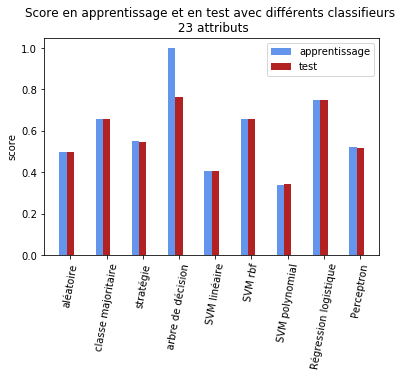

In [98]:
name=["aléatoire", "classe majoritaire", "stratégie", "arbre de décision", "SVM linéaire", "SVM rbf", "SVM polynomial", "Régression logistique", "Perceptron"]
rang = range(1,10)
width = 0.2
p1 = plt.bar(np.array(range(1,10))-0.2, x1, width, color="cornflowerblue" )
#plt.scatter([i+width/2.0 for i in x],x1,color='k',s=40)

p2 = plt.bar(rang, x2, width, color="firebrick")
#plt.scatter([i+width/2.0 for i in x],x1,color='k',s=40)

plt.xticks(rang, name, rotation=80)

plt.ylabel('score')
plt.title('Score en apprentissage et en test avec différents classifieurs \n 23 attributs')
plt.legend((p1[0], p2[0]), ('apprentissage', 'test'))
plt.show()

In [99]:
arr = np.array([x1, x2]).T
pd.DataFrame(arr, index=name, columns=["Score app", "Score test"])

,Score app,Score test
aléatoire,0.499785,0.497311
classe majoritaire,0.658585,0.656128
stratégie,0.550435,0.548225
arbre de décision,1.000000,0.761378
SVM linéaire,0.407810,0.407985
SVM rbf,0.658856,0.655248
SVM polynomial,0.339560,0.341587
Régression logistique,0.749191,0.747055
Perceptron,0.519852,0.519518


In [100]:
x1 = []
x2 = []

In [101]:
clf = tree.DecisionTreeClassifier(class_weight="balanced")
clf.fit(x_app, y_app)
x1.append(clf.score(x_app, y_app))
x2.append(clf.score(x_test,y_test))

In [102]:
svm_lin = svm.SVC(kernel='linear', max_iter=500, class_weight="balanced")
svm_lin.fit(x_app, y_app)
x1.append(svm_lin.score(x_app, y_app))
x2.append(svm_lin.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [103]:
svm_lin = svm.SVC(kernel='rbf', max_iter=500, class_weight="balanced")
svm_lin.fit(x_app, y_app)
x1.append(svm_lin.score(x_app, y_app))
x2.append(svm_lin.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [104]:
svm_lin = svm.SVC(kernel='poly', max_iter=500, class_weight="balanced")
svm_lin.fit(x_app, y_app)
x1.append(svm_lin.score(x_app, y_app))
x2.append(svm_lin.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [105]:
reg = linear_model.LogisticRegression(class_weight="balanced")
reg.fit(x_app, y_app)
x1.append(reg.score(x_app, y_app))
x2.append(reg.score(x_test,y_test))

In [106]:
per = linear_model.Perceptron()
per.fit(x_app, y_app)
x1.append(per.score(x_app, y_app))
x2.append(per.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


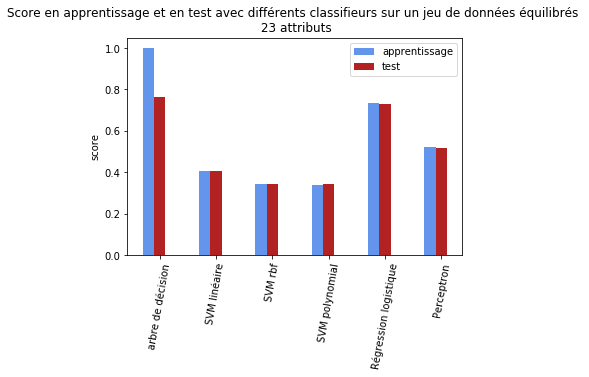

In [108]:
name=["arbre de décision", "SVM linéaire", "SVM rbf", "SVM polynomial", "Régression logistique", "Perceptron"]
rang = range(1,7)
width = 0.2
p1 = plt.bar(np.array(range(1,7))-0.2, x1, width, color="cornflowerblue" )
#plt.scatter([i+width/2.0 for i in x],x1,color='k',s=40)

p2 = plt.bar(rang, x2, width, color="firebrick")
#plt.scatter([i+width/2.0 for i in x],x1,color='k',s=40)

plt.xticks(rang, name, rotation=80)

plt.ylabel('score')
plt.title('Score en apprentissage et en test avec différents classifieurs sur un jeu de données équilibrés \n 23 attributs')
plt.legend((p1[0], p2[0]), ('apprentissage', 'test'))
plt.show()

In [109]:
arr = np.array([x1, x2]).T
pd.DataFrame(arr, index=name, columns=["Score app", "Score test"])

,Score app,Score test
arbre de décision,1.000000,0.765876
SVM linéaire,0.407810,0.407985
SVM rbf,0.342083,0.343872
SVM polynomial,0.339560,0.341587
Régression logistique,0.735289,0.732108
Perceptron,0.519852,0.519518


In [28]:
df3 = df.copy()
indi, indj = np.where(corr>0.7)
f = list(features)
for i,j in zip(indi, indj):
    if(i>j):
        if(f[i]!="0"):
            df3 = df3.drop(f[i],1).copy()
            f[i] = "0"
df3  

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi
0,138.470,51.655,97.827,27.980,0.910,3.064,41.928,1.582,1.396,32.638,1.017,0.381,2.273,-2.414,16.824,-0.277
1,160.937,68.768,103.235,48.146,-999.000,3.473,2.078,0.879,1.414,42.014,2.039,-3.011,0.501,0.103,44.704,-1.916
2,-999.000,162.172,125.953,35.635,-999.000,3.148,9.336,3.776,1.414,32.154,-0.705,-2.093,-0.953,1.052,54.283,-2.186
3,143.905,81.417,80.943,0.414,-999.000,3.310,0.414,2.354,-1.285,22.647,-1.655,0.010,-0.522,-3.100,31.082,0.060
4,175.864,16.915,134.805,16.405,-999.000,3.891,16.405,1.056,-1.385,28.209,-2.197,-2.231,0.798,1.569,2.723,-0.871
5,89.744,13.550,59.149,116.344,2.636,1.362,61.619,0.588,0.479,53.651,0.371,1.329,-0.884,1.857,40.735,2.237
6,148.754,28.862,107.782,106.130,0.733,2.941,2.545,3.371,1.393,28.850,1.113,2.409,0.675,-0.966,38.421,-1.443
7,154.916,10.418,94.714,29.169,-999.000,2.897,1.526,0.365,-1.305,78.800,0.654,1.547,0.506,-1.347,22.275,-1.761
8,105.594,50.559,100.989,4.288,-999.000,2.904,4.288,0.675,-1.366,39.008,2.433,-2.532,0.210,1.884,37.791,0.024
9,128.053,88.941,69.272,193.392,-999.000,1.609,28.859,0.599,0.538,54.646,-1.533,0.416,-0.317,-0.636,132.678,0.845


In [29]:
app = random.sample(range(0,len(x)), int(len(x)*0.9))
x_app = x[app]
y_app = y[app]

test = set(np.arange(0,len(x))) - set(app)
test = list(test)
test.sort()
x_test = x[test]
y_test = y[test]

In [31]:
x1 = []
x2 = []

In [32]:
uniform = dummy.DummyClassifier(strategy='uniform')
uniform.fit(x_app, y_app)
x1.append(uniform.score(x_app, y_app))
x2.append(uniform.score(x_test, y_test))

In [33]:
uniform = dummy.DummyClassifier(strategy='most_frequent')
uniform.fit(x_app, y_app)
x1.append(uniform.score(x_app, y_app))
x2.append(uniform.score(x_test, y_test))

In [34]:
uniform = dummy.DummyClassifier()
uniform.fit(x_app, y_app)
x1.append(uniform.score(x_app, y_app))
x2.append(uniform.score(x_test, y_test))

In [35]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_app, y_app)
x1.append(clf.score(x_app, y_app))
x2.append(clf.score(x_test,y_test))

In [36]:
svm_lin = svm.SVC(kernel='linear', max_iter=500)
svm_lin.fit(x_app, y_app)
x1.append(svm_lin.score(x_app, y_app))
x2.append(svm_lin.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [37]:
svm_lin = svm.SVC(kernel='rbf', max_iter=500)
svm_lin.fit(x_app, y_app)
x1.append(svm_lin.score(x_app, y_app))
x2.append(svm_lin.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [38]:
svm_lin = svm.SVC(kernel='poly', max_iter=500)
svm_lin.fit(x_app, y_app)
x1.append(svm_lin.score(x_app, y_app))
x2.append(svm_lin.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [39]:
reg = linear_model.LogisticRegression()
reg.fit(x_app, y_app)
x1.append(reg.score(x_app, y_app))
x2.append(reg.score(x_test,y_test))

In [40]:
per = linear_model.Perceptron()
per.fit(x_app, y_app)
x1.append(per.score(x_app, y_app))
x2.append(per.score(x_test,y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


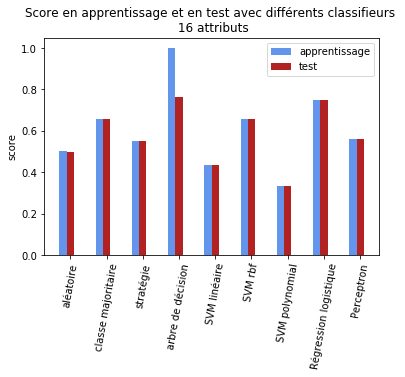

In [41]:
name=["aléatoire", "classe majoritaire", "stratégie", "arbre de décision", "SVM linéaire", "SVM rbf", "SVM polynomial", "Régression logistique", "Perceptron"]
rang = range(1,10)
width = 0.2
p1 = plt.bar(np.array(range(1,10))-0.2, x1, width, color="cornflowerblue" )
#plt.scatter([i+width/2.0 for i in x],x1,color='k',s=40)

p2 = plt.bar(rang, x2, width, color="firebrick")
#plt.scatter([i+width/2.0 for i in x],x1,color='k',s=40)

plt.xticks(rang, name, rotation=80)

plt.ylabel('score')
plt.title('Score en apprentissage et en test avec différents classifieurs \n 16 attributs')
plt.legend((p1[0], p2[0]), ('apprentissage', 'test'))
plt.show()

In [42]:
arr = np.array([x1, x2]).T
pd.DataFrame(arr, index=name, columns=["Score app", "Score test"])

,Score app,Score test
aléatoire,0.500663,0.499413
classe majoritaire,0.658207,0.659525
stratégie,0.549198,0.549814
arbre de décision,1.000000,0.765044
SVM linéaire,0.435675,0.436767
SVM rbf,0.658875,0.659049
SVM polynomial,0.335573,0.334388
Régression logistique,0.750161,0.750086
Perceptron,0.560818,0.559738


TP3

Arbre de décision

In [11]:
x = df.values
y = lab.values

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
pipe = Pipeline([("preprocessing", StandardScaler()), ('classifier', tree.DecisionTreeClassifier())])
param_grid = [{'classifier':[tree.DecisionTreeClassifier(random_state=0)],
              'preprocessing':[StandardScaler(), None],
              'classifier__max_depth':range(2, 50, 5),}]
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3)
grid.fit(X_train, Y_train)
dt_res_train = grid.cv_results_['mean_train_score']
dt_res_test = grid.cv_results_['mean_test_score']
dt_param = grid.cv_results_['params']
print("score train", grid.score(X_train, Y_train))
print("score test", grid.score(X_test, Y_test))

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


score train 0.842217265769
score test 0.826945639421


In [28]:
grid.cv_results_

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, 

{'mean_fit_time': array([  3.77748768,   3.3288757 ,  11.20770621,  10.05056055,
         16.55654518,  16.88559373,  21.84058817,  20.21080573,
         25.44771767,  24.20503235,  26.33175222,  28.1586744 ,
         35.29516506,  29.83598193,  28.335735  ,  27.35931325,
         28.09789014,  28.51127505,  29.17590102,  28.86354764]),
 'mean_score_time': array([ 0.57941755,  0.49136321,  0.64047488,  0.50600791,  0.5952061 ,
         0.53215925,  0.60893726,  0.51470772,  0.62437812,  0.52801609,
         0.63669856,  0.56076002,  0.78708259,  0.59240516,  0.64498138,
         0.55428131,  0.63356916,  0.58442036,  0.64846762,  0.55415257]),
 'mean_test_score': array([ 0.76836188,  0.76836188,  0.81571976,  0.81571824,  0.82403489,
         0.82402725,  0.81028124,  0.81028583,  0.79159016,  0.79159474,
         0.77806108,  0.77808857,  0.77095739,  0.77096503,  0.7684184 ,
         0.76841229,  0.76714279,  0.76714737,  0.76672574,  0.7667456 ]),
 'mean_train_score': array([ 0.7686

In [31]:
p = pd.DataFrame(grid.cv_results_)
p[['param_classifier__max_depth', 'param_preprocessing', 'mean_train_score', 'mean_test_score']]

C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\louis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, 

,param_classifier__max_depth,param_preprocessing,mean_train_score,mean_test_score
0,2,"StandardScaler(copy=True, with_mean=True, with...",0.768649,0.768362
1,2,None,0.768649,0.768362
2,7,"StandardScaler(copy=True, with_mean=True, with...",0.817040,0.815720
3,7,None,0.817040,0.815718
4,12,"StandardScaler(copy=True, with_mean=True, with...",0.845152,0.824035
5,12,None,0.845152,0.824027
6,17,"StandardScaler(copy=True, with_mean=True, with...",0.893850,0.810281
7,17,None,0.893850,0.810286
8,22,"StandardScaler(copy=True, with_mean=True, with...",0.948679,0.791590
9,22,None,0.948679,0.791595


In [8]:
res = []
for i in range(4, 31, 4):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i, class_weight='balanced')
    cv_results = cross_validate(clf, x, y, cv=None, return_train_score=True)
    res.append([cv_results['fit_time'], cv_results['score_time'], cv_results['train_score'], cv_results['test_score']])
res

[[array([ 11.98002791,  12.98153877,  12.34398079]),
  array([ 0.624192  ,  0.73287725,  0.61435819]),
  array([ 0.76891278,  0.76782978,  0.76997505]),
  array([ 0.76908637,  0.76587741,  0.77023593])],
 [array([ 22.57860994,  24.15838552,  20.98187876]),
  array([ 0.66624975,  0.78291154,  0.62934637]),
  array([ 0.80723422,  0.81073233,  0.80408731]),
  array([ 0.80517476,  0.80750588,  0.80130158])],
 [array([ 29.98177862,  33.57846475,  31.49974632]),
  array([ 0.63533092,  0.64929509,  0.63932157]),
  array([ 0.82350763,  0.82329347,  0.82366776]),
  array([ 0.8078989 ,  0.80882946,  0.80756384])],
 [array([ 38.99868608,  39.18817854,  38.25268388]),
  array([ 0.71708274,  0.66123366,  0.65926814]),
  array([ 0.85430374,  0.85378154,  0.85353983]),
  array([ 0.80053309,  0.80176795,  0.80019432])],
 [array([ 41.93779325,  43.57544327,  45.69577718]),
  array([ 0.66425705,  0.76498604,  0.68021321]),
  array([ 0.90005518,  0.89891144,  0.89785753]),
  array([ 0.79053115,  0.790897

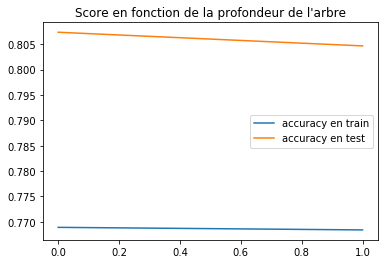

In [9]:
res = np.mean(res, axis=2)
res = res[:,2:]

plt.plot(res[0], label="accuracy en train")
plt.plot(res[1], label="accuracy en test")
plt.title("Score en fonction de la profondeur de l'arbre")
plt.legend()
plt.show()

Régression logistique

In [10]:
reg_res = []
for penalty in ['l1', 'l2']:
    res2 = []
    for c in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
        reg = linear_model.LogisticRegression(penalty=penalty, C=c, class_weight='balanced')
        cv_results = cross_validate(reg, x, y, cv=None, return_train_score=True)
        res2.append([cv_results['fit_time'], cv_results['score_time'], cv_results['train_score'], cv_results['test_score']])
    reg_res.append(res2)
reg_res

[[[array([ 3.13707399,  2.9680593 ,  2.94412541]),
   array([ 1.46000934,  0.61239457,  0.59544086]),
   array([ 0.69849732,  0.69996627,  0.69888156]),
   array([ 0.700466  ,  0.69748411,  0.69937854])],
  [array([ 55.34094214,  57.1581161 ,  67.63908458]),
   array([ 0.59942579,  0.60338759,  0.59543443]),
   array([ 0.73256204,  0.7335543 ,  0.73294616]),
   array([ 0.73427755,  0.73205473,  0.73252305])],
  [array([ 154.99941707,  180.57699895,  159.54824519]),
   array([ 0.61435437,  0.61239409,  0.61435676]),
   array([ 0.73438975,  0.73553049,  0.73487469]),
   array([ 0.73629774,  0.73370829,  0.73440393])],
  [array([ 233.7806952 ,  122.91423512,  122.60702872]),
   array([ 0.61040092,  0.61934328,  0.60039139]),
   array([ 0.73458224,  0.73560566,  0.73495902]),
   array([ 0.73635274,  0.73395027,  0.73455059])],
  [array([ 297.48726606,  273.7966361 ,  140.2319169 ]),
   array([ 0.62436104,  0.60440803,  0.59440804]),
   array([ 0.7346464 ,  0.73562215,  0.73496269]),
   arr

In [12]:
reg_res_l1 = reg_res[0]
reg_res_l2 = reg_res[1]

reg_res_l1 = np.mean(res, axis=2)
reg_res_l1 = reg_res_l1[:,2:]

reg_res_l2 = np.mean(res, axis=2)
reg_res_l2 = reg_res_l2[:,2:]

plt.plot(reg_res_l1[0], label="accuracy en train")
plt.plot(reg_res_l1[1], label="accuracy en test")
plt.title("Score de la régression logistique avec l1 comme pénalité \n en fonction du paramètre de régularisation C")
plt.legend()
plt.show()

plt.plot(reg_res_l2[0], label="accuracy en train")
plt.plot(reg_res_l2[1], label="accuracy en test")
plt.title("Score de la régression logistique avec l2 comme pénalité \n en fonction du paramètre de régularisation C")
plt.legend()
plt.show()

plt.plot(reg_res_l1[1], label="accuracy en test avec l1")
plt.plot(reg_res_l2[1], label="accuracy en test avec l2")
plt.title("Score de la régression logistique en test en fonction du parmètre de régularisation C")
plt.legend()
plt.show()

IndexError: too many indices for array

Random forest

In [ ]:
rf_res = []
for i in range(10, 300, 50):
    rf = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=0)
    cv_results = cross_validate(rf, x, y, cv=None, return_train_score=True)
    rf_res.append([cv_results['fit_time'], cv_results['score_time'], cv_results['train_score'], cv_results['test_score']])
rf_res

In [ ]:
rf_res = np.mean(rf_res, axis=2)
rf_res = rf_res[:,2:]

plt.plot(rf_res[0], label="accuracy en train")
plt.plot(rf_res[1], label="accuracy en test")
plt.title("Score en fonction de la profondeur des arbres")
plt.legend()
plt.show()

Ada Boost

In [ ]:
ab_res = []
for i in range(10, 300, 50):
    ab = ensemble.AdaBoostClassifier(n_estimator=i)
    cv_results = cross_validate(ab, x, y, cv=None, return_train_score=True)
    ab_res.append([cv_results['fit_time'], cv_results['score_time'], cv_results['train_score'], cv_results['test_score']])
ab_res

In [ ]:
ab_res = np.mean(ab_res, axis=2)
ab_res = ab_res[:,2:]

plt.plot(ab_res[0], label="accuracy en train")
plt.plot(ab_res[1], label="accuracy en test")
plt.title("Score en fonction de la profondeur des arbres")
plt.legend()
plt.show()

great search